In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

Visualizing distinguishability of anomaly score between different model. You should modify the path of test_loss and label in your case.

In [1]:
dataset = "SMAP"
test_loss = np.load(f'./{dataset}/loss/test_loss.npy')
label = np.load(f'./{dataset}/loss/label.npy')
anomaly_loss = test_loss[np.where(label > 0)]
normal_loss = test_loss[np.where(label == 0)]
plt.boxplot([anomaly_loss, normal_loss])
plt.show()

NameError: name 'np' is not defined

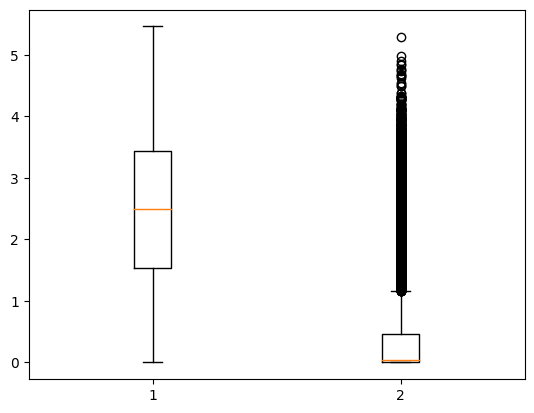

In [114]:
dataset = "ETL"
test_loss = np.load(f'./{dataset}/loss/test_loss.npy')
label = np.load(f'./{dataset}/loss/label.npy')
anomaly_loss = test_loss[np.where(label > 0)]
normal_loss = test_loss[np.where(label == 0)]
plt.boxplot([anomaly_loss, normal_loss])
plt.show()

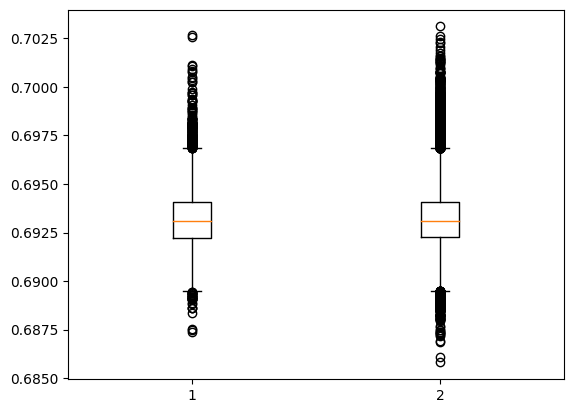

In [116]:
dataset = "MSL"
test_loss = np.load(f'./{dataset}/loss/test_loss.npy')
label = np.load(f'./{dataset}/loss/label.npy')
anomaly_loss = test_loss[np.where(label > 0)]
normal_loss = test_loss[np.where(label == 0)]
plt.boxplot([anomaly_loss, normal_loss])
plt.show()

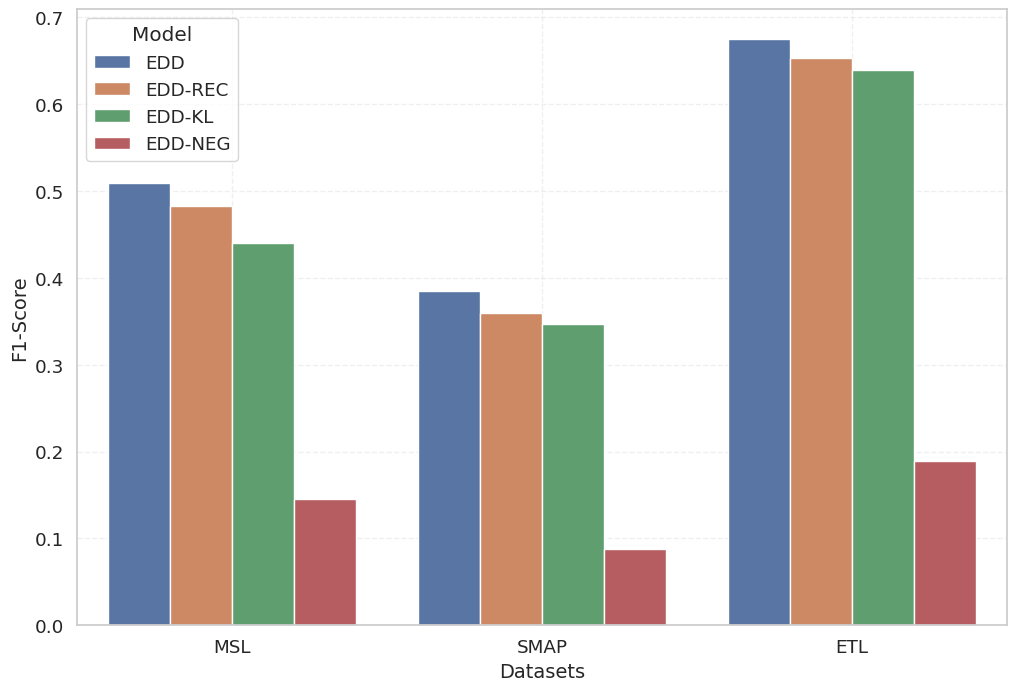

In [53]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# result of ablation studies
data = pd.DataFrame({"MSL":[0.5091, 0.4828, 0.4399, 0.1458],
              "SMAP":[0.3855, 0.3597, 0.3466, 0.0876],
              "ETL":[0.6757, 0.6530, 0.6398, 0.1897], "Model": ['EDD', 'EDD-REC', 'EDD-KL', 'EDD-NEG']})

df_long = data.melt(id_vars='Model', var_name='Variable', value_name='Value')

sn.set(style="whitegrid", font_scale=1.2)
fontsize = 14
# draw barchart with seaborn
plt.figure(figsize=(12, 8))
ax = sn.barplot(x='Variable', y='Value', hue='Model', data=df_long)
plt.xlabel('Datasets', fontsize=fontsize)
plt.ylabel('F1-Score', fontsize=fontsize)
plt.grid(linestyle="--", alpha=0.3)
plt.show()